<figure>
  <IMG SRC="img/logo.png" WIDTH=150 ALIGN="right">
</figure>

# Lab 5: Artificial Neural Network training, from scratch
## Artificial Intelligence
* Author (Student) : Yusif Ibrahimov

* Professor : Anne-Jeannin Girardon
---------

## Network architecture and data

As discussed during the lectures, a multi-layer perceptron is nothing more than a set of matrices
holding the parameters of the network for each layer. As such, we will only work on matrices that hold: <br>
1) the parameters of the model and <br> 2) the data we are working on.

### 1.1 Dealing with matrices

<b>1. How are the weights initialized ?</b><br>
    The weights are randomly initialized with seed of 42 between 0 and 1. It should not be too low and too high.<br>
    *Also, Xavier initialization can be used*
<br>

<hrule>
<b>Xavier initialization is also a type of random initialization.</b><br>
    
Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm\frac{\sqrt{2}}{\sqrt{n_i+n_{i+1}}}$$  where $n_i$ is the number of neurons on the layer "i"<br>
    


<b>2. Which activation functions are available to you in the given source code?</b><br>
<b><i>1.Tanh Function:</i></b>:<br>
$f(x) = \frac{2}{1+e^{-2x}}-1$ $\qquad$ and $\qquad$ $\frac{d}{dx}f(x) = 1 - f^2(x)$<br>
<br>
<b><i>2.Relu Function:</i></b>:<br>
$f(x) =  \begin{cases} 
      x & x\geq 0 \\
      0 & x < 0 
   \end{cases}
$ $\qquad$ and $\qquad$ $\frac{d}{dx}f(x) = \begin{cases} 
      1 & x\geq 0 \\
      0 & x < 0 
   \end{cases}
$
<br>
<br>
<b><i>3.Softmax Function:</i></b><br>
$f(y_i)= \frac{e^{y_i}}{\sum_{j=1}^{K}e^{y_j}}$
$\qquad$ and $\qquad$ $\frac{d}{dy_i}f(y_i)= \frac{e^{y_i}*\sum_{l=1}^{K}e^{y_l}}{(\sum_{j=1}^{K}e^{y_j})^2}$ where $l \neq i$ or $\frac{d}{dy}softmax(y) = softmax(y)*[1-softmax(y)] $

<b>3. Since we are dealing with a classification problem, what activation function will we use for our
output layer ?</b><br>
    For classification problem, we need to get the probability as the result. Therefore, we can use either sigmoid function or softmax function.<br>
    But which one?<br>
    It depends on the case. If the classification is the binary classification, we use sigmoid activation function. <br>
    If it's multiclass classification, then we prefer to use the softmax function

<b>4. What cost function is available to you ?</b><br>
    In the given source code, we are provided with the cross-entropy function.
    It can be either binary cross-entropy and categorical cross-entropy. Since, we perform the multiclass classification, we use the categorical crossentropy formula:
    $$C(y,p(y)) = -\sum y_i*log(p(y_i))$$

### 1.2 Neural Network architecture

<b>1. What proportion of the data are held for training ? for testing ?</b><br>
    We divide the full data into two parts: Training data and testing data. 75 % of the total data is dedicated to the training set and the rest part (25 % is given to test set) 

<b>2.What is contained in X train (resp. X test) and Y train (resp. Y test) ?</b><br>
    X_train is the matrix that contains the features of the 75 % full data. If we express the size of the train data is "m" , then $X_{train} \in \mathbb{R} ^{4 \times m } $  <br> 
    X_test is the matrix that contains the features of the 25 % full data. If we express the size of the test data is "n" , then $X_{test} \in \mathbb{R} ^{4 \times n } $  <br> 
    Y_train is the matrix that contains the labels of the 75 % full data. If we express the size of the train data is "m" , then $Y_{train} \in \mathbb{R} ^{1 \times m } $ , after encoding: $Y_{train} \in \mathbb{R} ^{3 \times m } $ <br> 
    Y_test is the matrix that contains the labels of the 25 % full data. If we express the size of the test data is "n" , then $Y_{test} \in \mathbb{R} ^{1 \times n } $ and after encoding $Y_{test} \in \mathbb{R} ^{3 \times n } $ <br> 

<b>3.How many hidden layers are used in this network ? How many units are there per layer ?</b><br>
  The number of the hidden layers is one. Because we have only 2 pairs of parameter matrices: $W^{[1]},b^{[1]}$ and $W^{[2]},b^{[2]}$. <br>$W^{[1]},b^{[1]}$ connects the input layer and the hidden layer, $W^{[2]},b^{[2]}$ connects the hidden layer and the output layer. <br>
  $W^{[1]} \in \mathbb{R} ^{3 \times 4 } ,b^{[1]}  \in \mathbb{R} ^{3 \times 1 } $ which means that first layer (input) contains 4 neurons ( number of features) and the hidden layer contains 3 neurons. <br>
$W^{[2]} \in \mathbb{R} ^{3 \times 3 } ,b^{[2]}  \in \mathbb{R} ^{3 \times 1 } $ which means that the output layer contains 3 neurons.

Here is the corresponding architecture of the Shallow Neural Network
<figure>
  <img SRC="img/network.png">
</figure>

### 3 Training and testing the model

<b>What is an epoch of training ?</b><br>
Epoch means the one movement of the all batches by the network. Here it's 800<br>
<br>
<b>Say we want to train on batches of size n. How will you implement an epoch of training</b>
we will take elements n by n, we will calculate the mean of the errors and update the parameters. It's one epoch<br>
<br>
<b>We know how to measure the error between our predictions and the expected labels on the output
label. Do we have target values for the hidden units ? How can we update the parameters on those
hidden units ?</b><br>
No we don't have the target values for hidden units<br>
We will calcuate their error portion using the chain rule and partial derivatives with backpropagation starting from the output layer<br>

## Importing , Visualization and Preparing the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from copy import deepcopy
from random import randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
# Importing the iris dataset
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


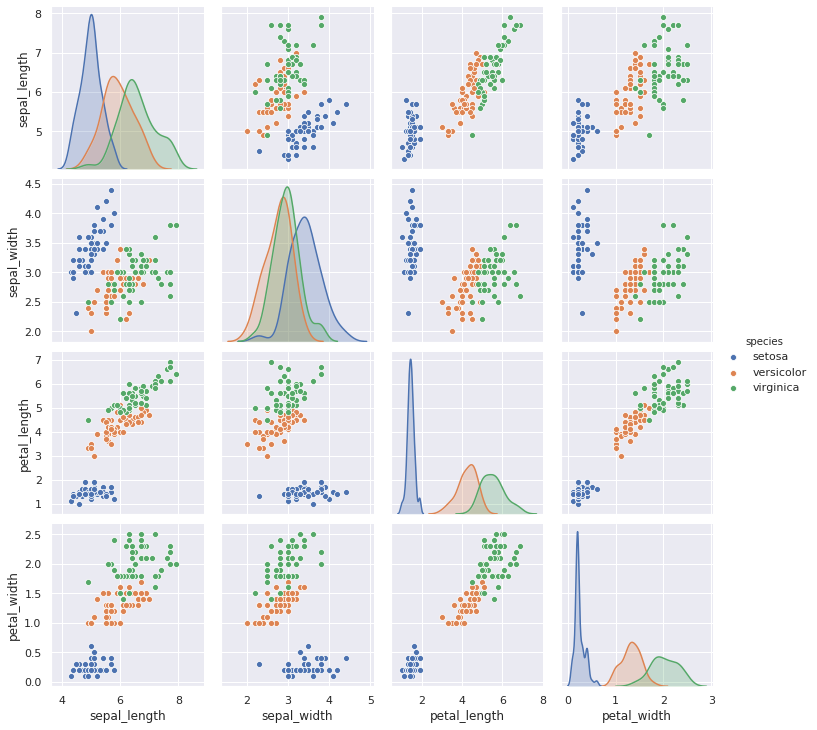

In [3]:
# Visualization of the iris dataset
sns.set()
sns.pairplot(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']],
             hue="species", diag_kind="kde")

Now we perform the data preparation.<br>
By saying the data preparation, we consider the splitting, encoding and fixing the input vs output dimensions

In [4]:
# The following function will help us to convert the labels to one hot 
# Then, it will divide the data into train and test sets
# Setosa [1,0,0]
# Versicolor [0,1,0]
# Virginica [0,0,1]
def encode_split(data,target_name='species', tst_size=0.25):
    encoded = pd.get_dummies(data[target_name])
    data = pd.concat([data.iloc[:,:-1], encoded], axis=1)
    X = data.iloc[:,:4]
    y = data.iloc[:,4:]
    X_train,X_test, y_train,y_test = train_test_split(X.values,y.values,test_size = tst_size,shuffle=True)
    return X_train.T,X_test.T,y_train.T,y_test.T

## Helper Functions

In [5]:
# Following method performs the  initialization of the weights by Xavier initialization
def weight_bias_initialization():
    np.random.seed(42)
    W1 = np.random.randn(3,4)*np.sqrt(2.0/7)
    b1 = np.zeros((3,1))
    
    W2 = np.random.randn(3,3)*np.sqrt(2.0/6)
    b2 = np.zeros((3,1))
    
    return W1,b1,W2,b2

In [6]:
# Following Cells are implementations of the activation functions
def tanh(vector):
    tan_h = 2.0/(1+np.exp(-2.0*vector))-1
    deriv = 1- np.power(tan_h,2)
    return tan_h,deriv

def relu(vector):
    rel_u = np.maximum(0,vector)
    deriv = deepcopy(vector)
    deriv[deriv<=0]=0
    deriv[deriv>0]=1
    return rel_u,deriv

    
def softmax(vector):
    elems = []
    cp = deepcopy(vector)
    if(len(vector.shape)==2):
        
        for i in range(vector.shape[1]):
            vect = vector[:,i]
            vect = np.exp(vect)/np.sum(np.exp(vect))
            elems.append(vect)
        return np.array(elems).T
    else:
        return np.exp(vector)/np.sum(np.exp(vector))
def softmax_derivative(vector):
    return softmax(vector)*(1-softmax(vector))

In [7]:
# Following method indicates the implementation of the categorical cross entropy cost function
def cross_entropy(y,y_hat):
    if (len(y.shape) == len(y_hat.shape)) and (len(y.shape)==1):
        entropy = -np.sum(y*np.log(y_hat))
    else:
        entropy = -np.sum(y*np.log(y_hat))
        entropy = entropy/y.shape[1]
    return entropy

Before starting to the implementation of the Neural Network class, we need to implement the shufle method which based on the <b>The Fisher-Yates Algorithm</b>

In [8]:
def shuffle_data(data):
    if len(data.shape) == 1:
        for i in range(len(data)-2,0,-1):
            j = randint(0,i+1)
            data[i],data[j] = data[j],data[i]
    else:
        for i in range(len(data[0])-2,-1,-1):
            j = randint(0,i+1)
            temp = np.copy(data[:, i])
            data[:, i] = data[:, j]
            data[:, j] = temp

## Implementation of 2 layer Neural Network class

In [9]:
class NeuralNet:
    def __init__(self,dataset,nb_epochs,nb_classes=3,batch_size=10,l_rate=0.075):
        self.dataset = dataset
        self.nb_epochs = nb_epochs
        self.nb_classes = nb_classes
        self.batch_size = batch_size
        self.l_rate=l_rate
        self.X_train,self.X_test,self.y_train,self.y_test = encode_split(self.dataset,target_name='species', tst_size=0.25)
        self.weight_initialization()
    
    # Following method will initialize the weights
    def weight_initialization(self):
        self.W1,self.b1,self.W2,self.b2 = weight_bias_initialization()
    
    # Method will train the model
    def train(self):
        full_cycles = self.X_train.shape[1]//self.batch_size
        count = 0
        train_errors = []
        test_errors = []
        for l in range(self.nb_epochs):
            errors = []
            for i in range(full_cycles+1):
                if (i != full_cycles):
                    A0 = self.X_train[:,i*self.batch_size:(i+1)*self.batch_size]
                    Y = self.y_train[:,i*self.batch_size:(i+1)*self.batch_size]
                elif (i == full_cycles) and self.X_train.shape[1]%self.batch_size!=0:
                    A0 = self.X_train[:,i*self.batch_size:]
                    Y = self.y_train[:,i*self.batch_size:]
                Z1 = np.dot(self.W1,A0)+self.b1
                A1 , dA1 = tanh(Z1)
                Z2 = np.dot(self.W2,A1)+self.b2
                A2  = softmax(Z2)
                error = cross_entropy(Y,A2)
                D2  = A2-Y
                dW2 =  (1/A0.shape[1])*np.dot(D2,A1.T)
                db2 = (1/A0.shape[1])*np.sum(D2,axis=1)
                db2 = db2.reshape(self.b2.shape)
                D1 = np.dot(self.W2,D2)*dA1
                dW1 = (1/A0.shape[1])*np.dot(D1,A0.T)
                db1 = (1/A0.shape[1])*np.sum(D1,axis=1)
                db1 = db1.reshape(self.b1.shape)

                self.W1 = self.W1 - self.l_rate*dW1
                self.b1 = self.b1 - self.l_rate*db1

                self.W2 = self.W2 - self.l_rate*dW2
                self.b2 = self.b2 - self.l_rate*db2
                
                errors.append(error)
            train_errors.append(np.mean(errors))
            test_Z1 = np.dot(self.W1,self.X_test)+ self.b1
            test_A1,_ = tanh(test_Z1)
            test_Z2 = np.dot(self.W2,test_A1)+self.b2
            test_A2 = softmax(test_Z2)
            
            test_errors.append(cross_entropy(self.y_test,test_A2))
            
                
        return train_errors,test_errors
    
    # The method will create the prediction of the train and test set in order to perform the model evaluation
    def data_turner(self):
        self.Y_pred_train = deepcopy(self.y_train)
        for i in range(self.X_train.shape[1]):
            val = self.X_train[:,i].reshape(self.X_train[:,i].shape[0],1)
            z1 = np.dot(self.W1,val)+self.b1
            a1,_ = tanh(z1)
            z2 = np.dot(self.W2,a1)+self.b2
            a2 = softmax(z2)
            for j in range(len(a2)):
                if( a2[j] == a2[a2.argmax()]):
                    a2[j]=1
                else:
                    a2[j]=0
            self.Y_pred_train[:,j] = a2.reshape(self.Y_pred_train[:,j].shape)
        
        self.Y_pred_test = deepcopy(self.y_test)
        for i in range(self.X_test.shape[1]):
            val = self.X_test[:,i].reshape(self.X_test[:,i].shape[0],1)
            z1 = np.dot(self.W1,val)+self.b1
            a1,_ = tanh(z1)
            z2 = np.dot(self.W2,a1)+self.b2
            a2 = softmax(z2)
            for j in range(len(a2)):
                if( a2[j] == a2[a2.argmax()]):
                    a2[j]=1
                else:
                    a2[j]=0
            
            self.Y_pred_test[:,j] = a2.reshape(self.Y_pred_test[:,j].shape)
    
    # Method will calculate the accuracy
    def accuracy(self):
        train_accuracy = 0
        test_accuracy = 0
        for i in range(self.y_train.T.shape[0]):
            if list(self.y_train.T[i])==list(self.Y_pred_train.T[i]):
                train_accuracy+=1
        train_accuracy = train_accuracy/self.y_train.T.shape[0] * 100
        for i in range(self.y_test.T.shape[0]):
            if list(self.y_test.T[i])==list(self.Y_pred_test.T[i]):
                test_accuracy+=1
        test_accuracy = test_accuracy/self.y_test.T.shape[0] * 100
        
        return train_accuracy, test_accuracy
    def predict(self,vector):
        vect = vector.reshape(nn.X_train[:,0].shape[0],1)
        z1 = np.dot(self.W1,vect)+self.b1
        a1,_ = tanh(z1)
        z2 = np.dot(self.W2,a1)+self.b2
        a2 = softmax(z2)
        for j in range(len(a2)):
            if( a2[j] == a2[a2.argmax()]):
                a2[j]=1
            else:
                a2[j]=0
        a2 = a2.reshape(1,a2.shape[0])
        if list(a2[0])==list([0,0,1]):
            print('Iris Virginica')
        elif list(a2[0])==list([1,0,0]):
            print('Iris Setosa')
        elif list(a2[0])==list([0,1,0]):
            print('Iris Versicolor')
        else:
            print('Problem')

In [10]:
nn =NeuralNet(iris,400,batch_size=4,l_rate=0.15)

In [11]:
train_errors,test_errors = nn.train()

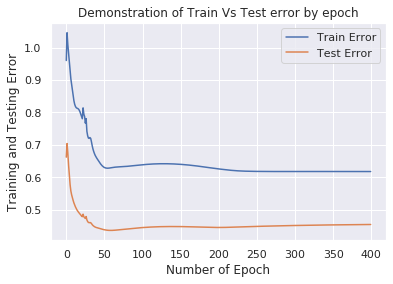

In [12]:
plt.plot(train_errors,label='Train Error')
plt.plot(test_errors,label='Test Error')
plt.title('Demonstration of Train Vs Test error by epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Training and Testing Error')
plt.legend()
plt.show()

In [13]:
nn.data_turner()
nn.accuracy()

(99.10714285714286, 97.36842105263158)

In [14]:
print(classification_report(nn.Y_pred_train.T,nn.y_train.T))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        40
           2       0.97      1.00      0.99        34

   micro avg       0.99      0.99      0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112
 samples avg       0.99      0.99      0.99       112



In [15]:
print(classification_report(nn.Y_pred_test.T,nn.y_test.T))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.97        14

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38



In [16]:
print(nn.predict(nn.X_test.T[0]))
print(nn.y_test.T[0])

Iris Setosa
None
[1 0 0]
